In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import minmax_scale
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
X = np.load('X.npy')
Y = np.load('y.npy')
print(X.shape, Y.shape)

(5000, 400) (5000, 1)


In [ ]:
Y = to_categorical(Y)
print(Y.shape)

(5000, 10)


In [ ]:
X = minmax_scale(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
model = keras.Sequential()

for i in range(8):
  model.add(keras.layers.Dense(32, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=32)

Epoch 1/32
118/118 [==============================] - 1s 2ms/step - loss: 1.7859 - accuracy: 0.3424
Epoch 2/32
118/118 [==============================] - 0s 3ms/step - loss: 0.9849 - accuracy: 0.6613
Epoch 3/32
118/118 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.7941
Epoch 4/32
118/118 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.8416
Epoch 5/32
118/118 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.8661
Epoch 6/32
118/118 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8843
Epoch 7/32
118/118 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8909
Epoch 8/32
118/118 [==============================] - 0s 3ms/step - loss: 0.2986 - accuracy: 0.9107
Epoch 9/32
118/118 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.9155
Epoch 10/32
118/118 [==============================] - 0s 2ms/step - loss: 0.2837 - accuracy: 0.9128

In [ ]:
print(model.metrics_names)
model.evaluate(X_test, Y_test)

['loss', 'accuracy']
40/40 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.9056


[0.4706268012523651, 0.9056000113487244]

9


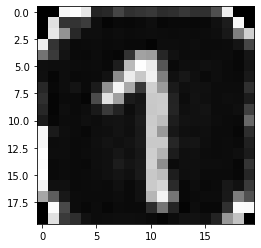

In [ ]:
original_Y = np.load('y.npy')
X = X.reshape(X.shape[0], 20, 20)
n = 7

for i in range(len(original_Y)):
  if original_Y[i][0] == n and np.argmax(model.predict(np.array([X[i].reshape(400)]))[0]) != original_Y[i]:
    print(np.argmax(model.predict(np.array([X[i].reshape(400)]))[0]))
    plt.imshow(X[i].transpose(), cmap='gray')
    break